In [11]:
pip install calmap

Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
# from ydata_profiling import ProfileReport

In [27]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [32]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [23]:
df.columns

NameError: name 'df' is not defined

In [21]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [23]:
df['Date'] = pd.to_datetime(df['Date'])

In [25]:
df['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [29]:
df.set_index('Date', inplace=True)

In [31]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [3]:
sns.histplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']), c="red", ls='--', label='Mean')
plt.axvline(x=np.percentile(df['Rating'], 25), c="green", ls='--', label='25-75th percentile')
plt.axvline(x=np.percentile(df['Rating'], 75), c="green", ls='--')
plt.legend()

NameError: name 'sns' is not defined

array([[<Axes: title={'center': 'Unit price'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Tax 5%'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'cogs'}>,
        <Axes: title={'center': 'gross margin percentage'}>],
       [<Axes: title={'center': 'gross income'}>,
        <Axes: title={'center': 'Rating'}>, <Axes: >]], dtype=object)

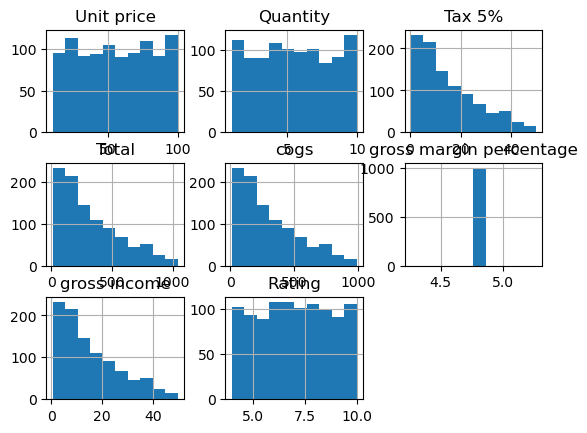

In [55]:
df.hist()

array([[<Axes: title={'center': 'Unit price'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Tax 5%'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'cogs'}>,
        <Axes: title={'center': 'gross margin percentage'}>],
       [<Axes: title={'center': 'gross income'}>,
        <Axes: title={'center': 'Rating'}>, <Axes: >]], dtype=object)

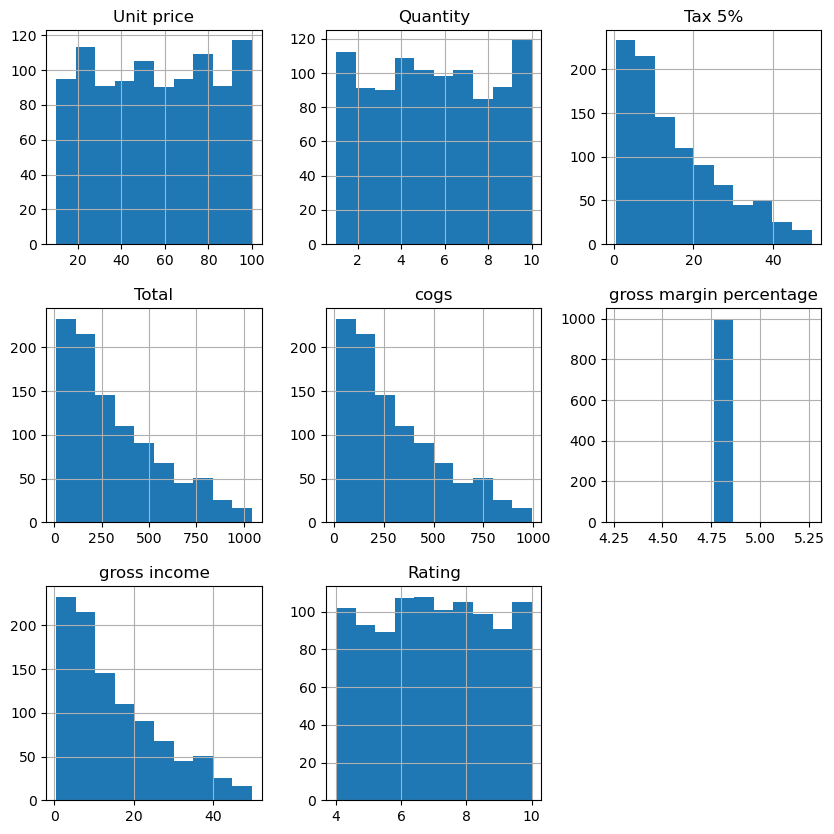

In [57]:
df.hist(figsize=(10, 10))

<Axes: xlabel='count', ylabel='Branch'>

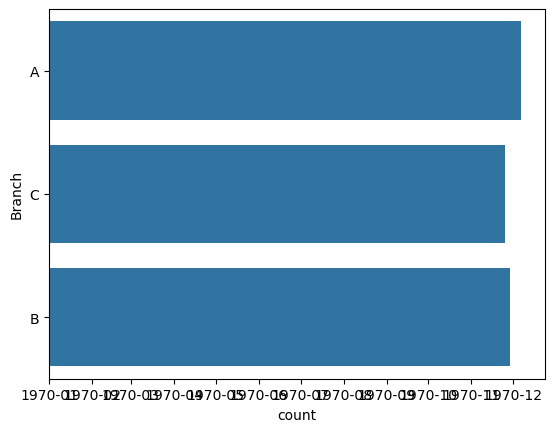

In [59]:
sns.countplot(df['Branch'])

In [61]:
df['Branch'].value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Payment'>

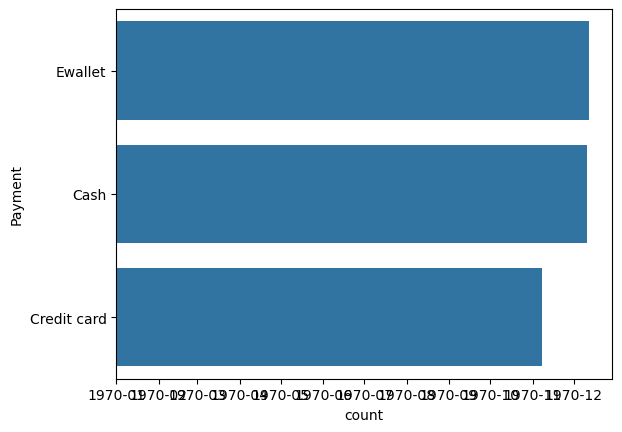

In [67]:
sns.countplot(df['Payment'])

<Axes: xlabel='Rating', ylabel='gross income'>

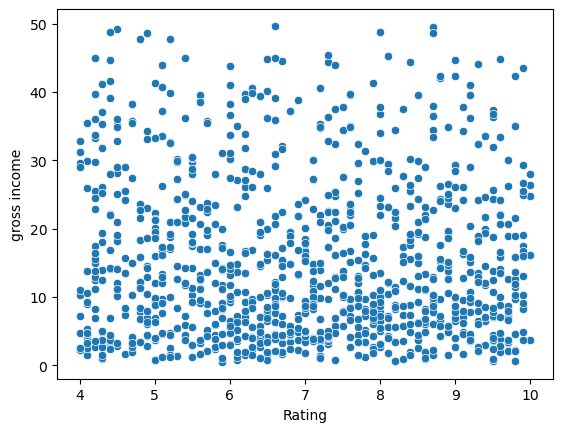

In [87]:
sns.scatterplot(data=df, x="Rating", y="gross income")

<Axes: xlabel='Rating', ylabel='gross income'>

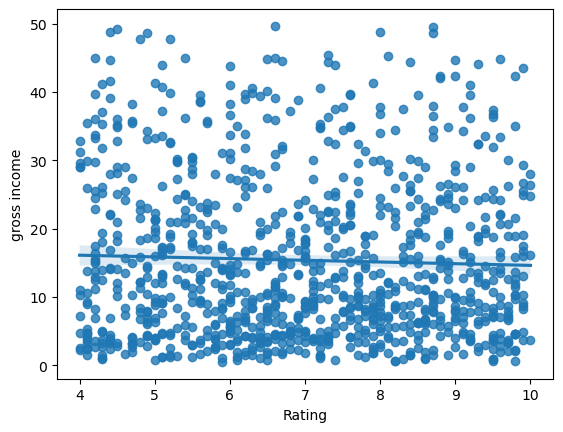

In [83]:
sns.regplot(data=df, x="Rating", y="gross income")

<Axes: xlabel='Branch', ylabel='gross income'>

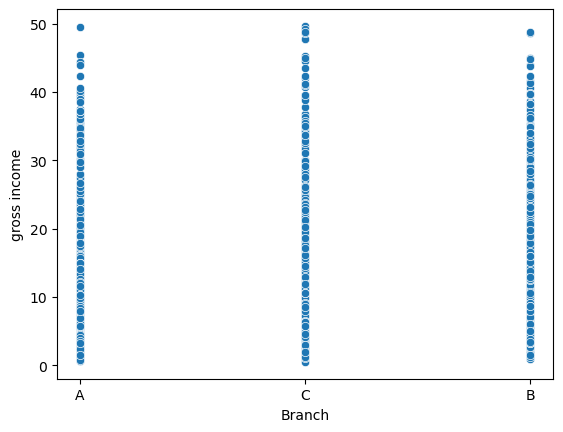

In [89]:
sns.scatterplot(data=df, x="Branch", y="gross income")

<Axes: xlabel='Branch', ylabel='gross income'>

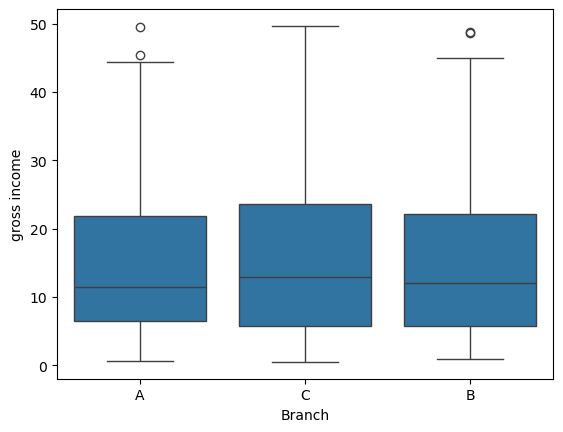

In [93]:
sns.boxplot(data=df, x="Branch", y="gross income")

In [101]:
df.groupby(['Date']).mean(numeric_only=True)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,
2019-01-01,54.995833,6.750000,18.830083,395.431750,376.601667,4.761905,18.830083,6.583333
2019-01-02,44.635000,6.000000,11.580375,243.187875,231.607500,4.761905,11.580375,6.050000
2019-01-03,59.457500,4.625000,12.369813,259.766062,247.396250,4.761905,12.369813,8.112500
2019-01-04,51.743333,5.333333,12.886417,270.614750,257.728333,4.761905,12.886417,6.516667
2019-01-05,61.636667,4.583333,14.034458,294.723625,280.689167,4.761905,14.034458,7.433333
...,...,...,...,...,...,...,...,...
2019-03-26,42.972308,4.000000,7.188692,150.962538,143.773846,4.761905,7.188692,6.623077
2019-03-27,56.841000,4.500000,13.822950,290.281950,276.459000,4.761905,13.822950,6.760000
2019-03-28,45.525000,4.800000,10.616200,222.940200,212.324000,4.761905,10.616200,7.050000


<Axes: xlabel='Date', ylabel='gross income'>

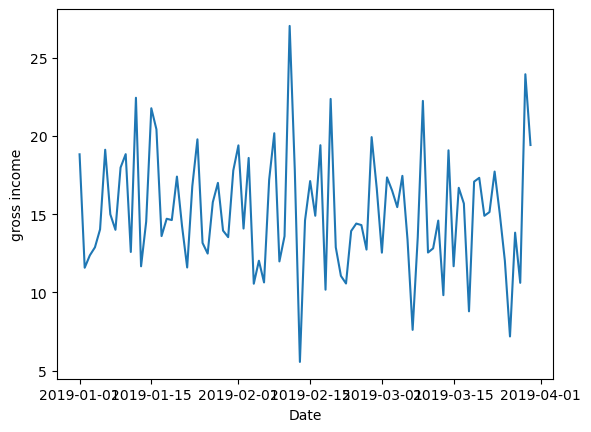

In [109]:
sns.lineplot(x=df.groupby(['Date']).mean(numeric_only=True).index, y=df.groupby(['Date']).mean(numeric_only=True)['gross income'])

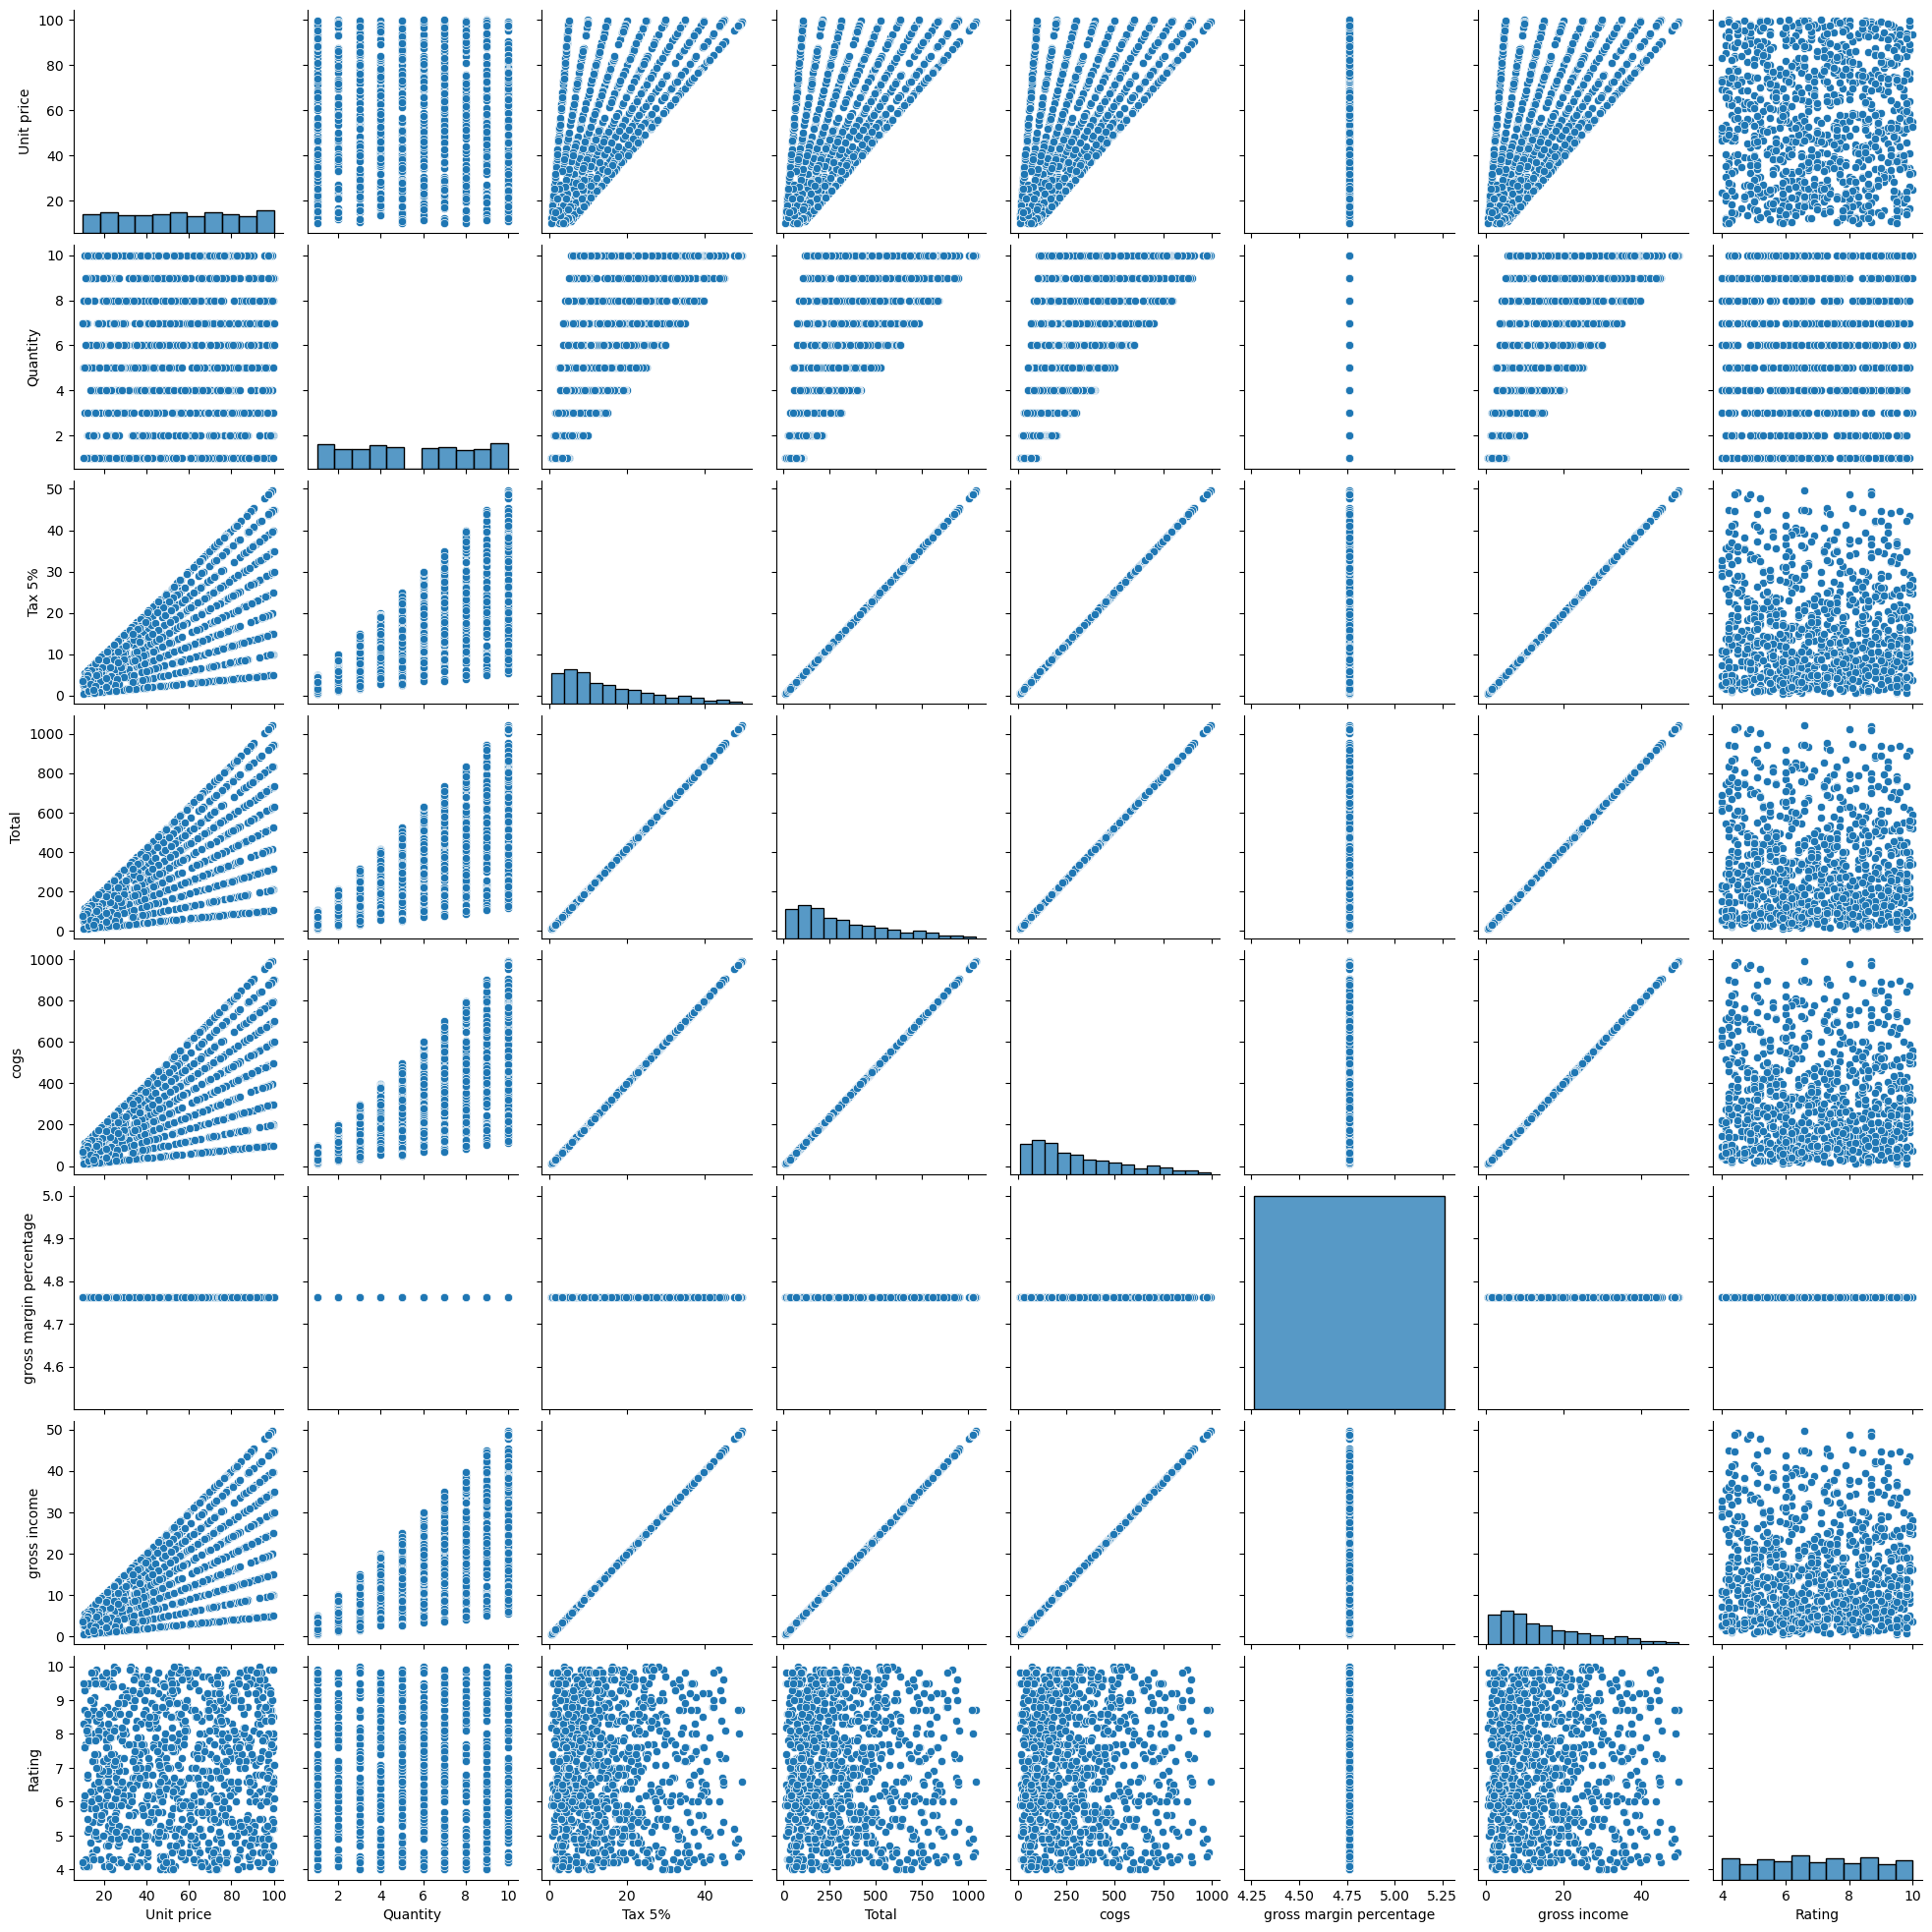

In [111]:
sns.pairplot(df)

In [113]:
df.duplicated()

Date
2019-01-05    False
2019-03-08    False
2019-03-03    False
2019-01-27    False
2019-02-08    False
              ...  
2019-01-29    False
2019-03-02    False
2019-02-09    False
2019-02-22    False
2019-02-18    False
Length: 1000, dtype: bool

In [115]:
df.duplicated().sum()

0

In [117]:
df[df.duplicated()==True]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,


In [119]:
df.drop_duplicates(inplace=True)

In [121]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

<Axes: ylabel='Date'>

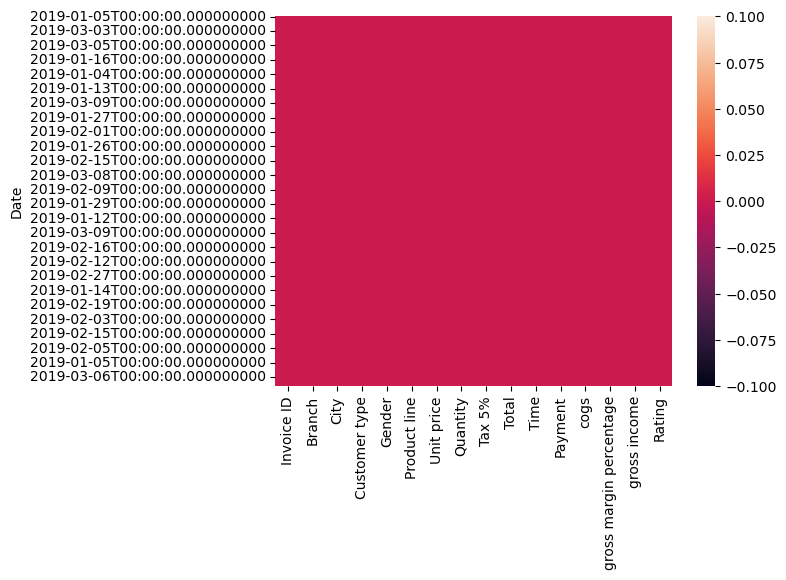

In [123]:
sns.heatmap(df.isnull())

In [131]:
df.fillna(df.mean(), inplace=True)

TypeError: Could not convert ['750-67-8428226-31-3081631-41-3108123-19-1176373-73-7910699-14-3026355-53-5943315-22-5665665-32-9167692-92-5582351-62-0822529-56-3974365-64-0515252-56-2699829-34-3910299-46-1805656-95-9349765-26-6951329-62-1586319-50-3348300-71-4605371-85-5789273-16-6619636-48-8204549-59-1358227-03-5010649-29-6775189-17-4241145-94-9061848-62-7243871-79-8483149-71-6266640-49-2076595-11-5460183-56-6882232-16-2483129-29-8530272-65-1806333-73-7901777-82-7220280-35-5823554-53-8700354-25-5821228-96-1411617-15-4209132-32-9879370-41-7321727-46-3608669-54-1719574-22-5561326-78-5178162-48-8011616-24-2851778-71-5554242-55-6721399-46-5918106-35-6779635-40-6220817-48-8732120-06-4233285-68-5083803-83-5989347-34-2234199-75-8169853-23-2453877-22-3308838-78-4295109-28-2512232-11-3025382-03-4532393-65-2792796-12-2025510-95-6347841-35-6630287-21-9091732-94-0499263-10-3913381-20-0914829-49-1914756-01-7507870-72-4431847-38-7188480-63-2856787-56-0757360-39-5055730-50-9884362-58-8315633-44-8566504-35-8843318-68-5053565-80-5980225-32-0908873-51-0671152-08-9985512-91-0811594-34-4444766-85-7061871-39-9221865-92-6136733-01-9107163-56-7055189-98-2939551-21-3069212-62-1842716-39-1409704-48-3927628-34-3388630-74-5166588-01-7461861-77-0145479-26-8945210-67-5886227-78-1148645-44-1170237-01-6122225-98-1496291-32-1427659-65-8956642-32-2990378-24-2715638-60-7125659-36-1684219-22-9386336-78-2147268-27-6179668-90-8900870-54-3162189-08-9157663-86-9076549-84-7482191-10-6171802-70-5316695-51-0018590-83-4591483-71-1164597-78-7908700-81-1757354-39-5160241-72-9525575-30-8091731-81-9469280-17-4359338-65-2210488-25-4221239-10-7476458-41-1477685-64-1609568-90-5112262-47-2794238-49-0436608-96-3517584-86-7256746-94-0204214-17-6927400-89-4171782-95-9291279-74-2924307-85-2293743-04-1105423-57-2993894-41-5205275-28-0149101-17-6199423-80-0988548-46-9322505-02-0892234-65-2137687-47-8271796-32-9050105-31-1824249-42-3782316-55-4634733-33-4967608-27-6295414-12-7047827-26-2100175-54-2529139-52-2867407-63-8975342-65-4817130-98-8941434-83-9547851-28-6367824-88-3614586-25-0848895-66-0685305-14-0245732-04-5373400-60-7251593-65-1552284-34-9626437-58-8131286-43-6208641-43-2399831-07-6050556-86-3144848-24-9445856-22-8149699-01-4164420-11-4919606-80-4905542-41-0513426-39-2418875-46-5808394-43-4238749-24-1565672-51-8681263-87-5680573-58-9734817-69-8206888-02-0338677-11-0152142-63-6033656-16-1063891-58-8335802-43-8934560-30-5617319-74-2561549-03-9315790-29-1172239-36-3640468-01-2051389-25-3394279-62-1445213-72-6612746-68-6593836-82-5858583-72-1480466-61-5506721-86-6247289-65-5721545-46-3100418-02-5978269-04-5750157-13-5295645-78-8093211-30-9270755-12-3214346-84-3103478-06-7835540-11-4336448-81-5016142-72-4741217-58-1179376-02-8238530-90-9855866-05-7563604-70-6476799-71-1548785-13-7708845-51-0542662-47-5456883-17-4236290-68-2984704-11-6354110-48-7033366-93-0948729-09-9681151-16-1484380-94-4661850-41-9669821-07-3596655-85-5130447-15-7839154-74-7179253-12-6086808-65-0703571-94-0759144-51-6085731-14-2199783-09-1637687-15-1097126-54-1082633-91-1052477-24-6490566-19-5475526-86-8552376-56-3573537-72-0426828-61-5674136-08-6195523-38-0215490-29-1201667-92-0055565-17-3836498-41-1961593-95-4461226-71-3580283-79-9594430-60-3493139-20-0155558-80-4082278-97-7759316-68-6352585-03-5943211-05-0490727-75-6477744-02-5987307-83-9164779-06-0012446-47-6729573-10-3877735-06-4124439-54-7422396-90-2219411-77-0180286-01-5402803-17-8013512-98-1403848-42-2560532-59-7201181-94-6432870-76-1733423-64-4619227-07-4446174-36-3675428-83-5800603-07-0961704-20-4138787-15-1757649-11-3678622-20-1945372-94-8041563-91-7120746-54-5508276-54-0879815-11-1168719-76-3868730-61-8757340-66-0321868-81-1752634-97-8956566-71-1091442-48-3607835-16-0096527-09-6272898-04-2717692-27-8933633-09-3463374-17-3652378-07-7001433-75-6987873-95-4984416-13-5917150-89-8043135-84-8019441-94-7118725-96-3778531-80-1784400-45-1220860-79-0874834-61-8124115-99-4379565-67-6697320-49-6392889-04-9723632-90-0281554-42-2417453-63-6187578-80-7669612-36-5536605-72-4132471-41-2823462-67-9126272-27-9238834-25-9262122-61-9553468-88-0009613-59-9758254-31-0042201-86-2184261-12-8671730-70-9830382-25-8917422-29-8786667-23-5919843-01-4703743-88-1662595-86-2894182-69-8360289-15-7034462-78-5240868-52-7573153-58-4872662-72-2873525-88-7307689-16-9784725-56-0833394-41-0748596-42-3999541-89-9860173-82-9529563-36-9814308-47-4913885-17-6250726-27-2396316-01-3952760-54-1821793-10-3222346-12-3257110-05-6330651-61-0874236-86-3015831-64-0259587-03-7455882-40-4577732-67-5346725-32-9708256-08-8343372-26-1506244-08-0162569-71-4390132-23-6451696-90-2548472-15-9636268-03-6164750-57-9686186-09-3669848-07-1692745-71-3520266-76-6436740-22-2500271-88-8734301-81-8610489-64-4354198-84-7132269-10-8440650-98-6268741-73-3559325-77-6186286-75-7818574-57-9721459-50-7686616-87-0016837-55-7229751-69-0068257-73-1380345-08-4992549-96-4200810-60-6344450-28-2866394-30-3170138-17-5109192-98-7397301-11-9629390-80-5128235-46-8343453-12-7053296-11-7041449-27-2918891-01-7034744-09-5786727-17-0390568-88-3448187-83-5490767-54-1907710-46-4433533-33-5337325-90-8763729-46-7422639-76-1242234-03-4040326-71-2155320-32-8842470-32-9057878-30-2331440-59-5691554-53-3790746-19-0921233-34-0817767-05-1286340-21-9136405-31-3305731-59-7531676-39-6028502-05-1910485-30-8700598-47-9715701-69-8742575-67-1508541-08-3113246-11-3901674-15-9296305-18-3552493-65-6248438-01-4015709-58-4068795-49-7276556-72-8512627-95-3243686-41-0932510-09-5628608-04-3797148-82-2527437-53-3084632-32-4574556-97-7101862-59-8517401-18-8016420-18-8989277-63-2961573-98-8548620-02-2046282-35-2475511-54-3087726-29-6793387-49-4215862-17-9201291-21-5991602-80-9671347-72-6115209-61-0206595-27-4851189-52-0236503-07-0930413-20-6708425-85-2085521-18-7827220-28-1851600-38-9738734-91-1155451-28-5717609-81-8548133-14-7229534-01-4457719-89-8991286-62-6248339-38-9982827-44-5872827-77-7633287-83-1405435-13-4908857-67-9057236-27-1144892-05-6689583-41-4548339-12-4827643-38-7867308-81-0538358-88-9262460-35-4390343-87-0864173-50-1108243-47-2663841-18-8232701-23-5550647-50-1224541-48-8554539-21-7227213-32-1216747-58-7183582-52-8065210-57-1719399-69-4630134-75-2619356-44-8813198-66-9832283-26-5248712-39-0363218-59-9410174-75-0888866-99-7614134-54-4720760-90-2357514-37-2845698-98-5964718-57-9773651-88-7328241-11-2261408-26-9866834-83-1826343-61-3544239-48-4278355-34-6244550-84-8664339-96-8318458-61-0011592-34-6155797-88-0493207-73-1363390-31-6381443-82-0585339-18-7061359-90-3665375-72-3056127-47-6963278-86-2735695-28-6250379-17-6588227-50-3718302-15-2162788-07-8452560-49-6611880-35-0356585-11-6748470-31-3286152-68-2907123-35-4896258-69-7810334-64-2006219-61-4139881-41-7302373-09-4567642-30-6693484-22-8230830-58-2383559-98-9873544-32-5024318-12-0304349-97-8902421-95-9805277-35-5865789-23-8625284-54-4231443-59-0061509-29-3912327-40-9673840-19-2096828-46-6863641-96-3695420-97-3340436-54-4512670-79-6321852-62-7105598-06-7312135-13-8269816-57-2053628-90-8624856-66-2701308-39-1707149-61-1929655-07-2265589-02-8023420-04-7590182-88-2763188-55-0967610-46-4100318-81-2368364-33-8584665-63-9737695-09-5146155-45-3814794-32-2436131-15-8856273-84-2164706-36-6154778-89-7974574-31-8277859-71-0933740-11-5257369-82-2676563-47-4072742-04-5161149-15-7606133-77-3154169-52-4504250-81-7186562-12-5430816-72-8853491-38-3499322-02-2271842-29-4695725-67-2480641-51-2661714-02-3114518-17-2983779-42-2410190-14-3147408-66-6712679-22-6530588-47-8641642-61-4706576-31-4774556-41-6224811-03-8790242-11-3142752-23-3760274-05-5470648-94-3045130-67-4723528-87-5606320-85-2052370-96-0655105-10-6182510-79-0415241-96-5076767-97-4650648-83-1321173-57-2300305-03-2383394-55-6384266-20-6657689-05-1884196-01-2849372-62-5264800-09-8606182-52-7000826-58-8051868-06-0466751-41-9720626-43-7888176-64-7711191-29-0321729-06-2010640-48-5028186-79-9562834-45-5519162-65-8559760-27-5490445-30-9252786-94-2700728-88-7867183-21-3799268-20-3585735-32-9839258-92-7466857-16-3520482-17-1179788-21-5741821-14-9046418-05-0656678-79-0726776-68-1096592-46-1692434-35-9162149-14-0304442-44-6497174-64-0215210-74-9613299-29-0180247-11-2470635-28-5728756-49-0168438-23-1242238-45-6950607-65-2441386-27-7606137-63-5492197-77-7132805-86-0265733-29-1227451-73-2711373-14-0504546-80-2899345-68-9016390-17-5806457-13-1708664-14-2882487-79-6868314-23-4520210-30-7976585-86-8361807-14-7833775-72-1988288-38-3758652-43-6591785-96-0615406-46-7107250-17-5703156-95-3964842-40-8179525-09-8450410-67-1709587-73-4862787-87-2010593-14-4239801-88-0346388-76-2555711-31-1234886-54-6089707-32-7409759-98-4285201-63-8275471-06-8611200-16-5952120-54-2248102-77-2261875-31-8302102-06-2002457-94-0464629-42-4133534-53-3526307-04-2070468-99-7231516-77-6464404-91-5964886-77-9084790-38-4466704-10-4056497-37-6538651-96-5970400-80-4065744-16-7898263-12-5321702-72-0487605-83-1050443-60-9639864-24-7918359-94-5395401-09-4232751-15-6198324-41-6833474-33-8305759-29-9521831-81-6575220-68-6701618-34-8551257-60-7754559-61-5987189-55-2313565-91-4567380-60-5336815-04-6282674-56-6360778-34-2523499-27-7781477-59-2456832-51-6761869-11-3082190-59-3964366-43-6862186-43-8965784-21-9238276-75-6884109-86-4363569-76-2760222-42-0244760-53-9233538-22-0304416-17-9926237-44-6163636-17-0325343-75-9322528-14-9470427-45-9297807-34-3742288-62-1085670-71-7306660-29-7083271-77-8740497-36-0989291-59-1384860-73-6466549-23-9016896-34-0956804-38-3935585-90-0249862-29-5914845-94-6841125-45-2293843-73-4724409-33-9708658-66-3967866-70-2814160-22-2687895-03-6665770-42-8960748-45-2862234-36-2483316-66-3011848-95-6252840-76-5966152-03-4217533-66-5566124-31-1458176-78-1170361-59-0574101-81-4070631-34-1880852-82-2749873-14-6353584-66-4073544-55-9589166-19-2553737-88-5876154-87-7367885-56-0389608-05-3804448-61-3783761-49-0439490-95-0021115-38-7388311-13-6971291-55-6563548-48-3156460-93-5834325-89-4209884-80-6021137-74-8729880-46-5796389-70-2397114-35-5271607-76-6216715-20-1673811-35-1094699-88-1972781-84-8059409-49-6995725-54-0677146-09-5432377-79-7592509-10-0516595-94-9924865-41-9075545-07-8534118-62-1812450-42-3339851-98-3555186-71-5196624-01-8356313-66-9943151-27-8496453-33-6436522-57-8364459-45-2396717-96-4189722-13-2115749-81-8133777-67-2495636-98-3364246-55-6923181-82-6255838-02-1821887-42-0517457-12-0244226-34-0034321-49-7382397-25-8725431-66-2305825-94-5922641-62-7288756-93-1854243-55-8457458-10-8612501-61-1753235-06-8510433-08-7822361-85-2571131-70-8179500-02-2261720-72-2436702-83-5291809-69-9497449-16-6770333-23-2632489-82-1237859-97-6048676-10-2200373-88-1424365-16-4334503-21-4385305-89-2768574-80-1489784-08-0310200-40-6154846-10-0341577-34-7579430-02-3888867-47-1948384-59-6655256-58-3609324-92-3863593-08-5916364-34-2972794-42-3736172-42-8274558-60-5016195-06-0432605-03-2706214-30-2776746-04-1077448-34-8700452-04-8808531-56-4728744-82-9138883-69-1285221-25-5073518-71-6847156-20-0370151-33-7434728-47-9078809-46-1866139-32-4183148-41-7930189-40-5216374-38-5555764-44-8999552-44-5977267-62-7380430-53-4718886-18-2897602-16-6955745-74-0715690-01-6631652-49-6720233-67-5758303-96-2227727-02-1313347-56-2442849-09-3807'
 'ACAAACACABBBAAABAAABCBBAAABABABBBACCAACBBCBCCBBBBCCABCBCAAACCCBABACBAACCBCACCACCCBCCCCCAABCCABCABCABCCCABACACCBCBACCBBABACBCBAACCBBABBCCAABACCCCACACBABCACCABBBBCAACBBCAAAABCBBAACACCCACABBBACBBCBACCACCCBCBBACCBBACBBBABABBBBCCACBCBABBBBAACCBAAACABABAABBCCAABAAACACBABACBAABCAABBCCCAACAAABCCBABCAABCCAACCBCABAAAAABCAACCCCCCCCAAABACBABAAACAABCBBBBCAAACABCABBCBCCBBACCACCCACABBCCAABCCBACBCABCACBCBAAAAABBBCCCBCAABACBBAAABCCBACCCBCBABBABCABBCCACCCBACABCCBBBBAAABBBCCCBCCACCBCCCAABAAACBACCABCBBACBBABCBBCCBABCCBBABBBCBAAACCBCACBCACAABBBAAABCACBAACACBCBBAABABBBCABBCAABCBABACABCBBABABBCABCACBBAAACACCAABBACCACCCBCBACABACBCAABCACAABBBBABAAAAABBBACBBBCBCCACBCCBBABBACAAABCBCCABBCBABBCABBACABBCABBBACACCACCAABACCBBBBBBCCAACCCCAAAABBCBCBCCBCBAAABBCCCBACCAACCBCBCBAABCABAAABBAAABCBBABCCCCBCBCBCAACCACCCAACBAABCABCBCCABAAABCBACAABCABBBACABABACAABBABAABCCABACAAACCAAACBABBABACABBACBCCAACBAACCBABBCBAAAAACACBCBBBCCCACBAACCCBABBCAAACCABBCBCCCBBABBBCACBCCAACACAAAACBCBBBBCBACBCACAACBBAAABBBBACBABBBCAACCBBBCBABABCCBAAA'
 'YangonNaypyitawYangonYangonYangonNaypyitawYangonNaypyitawYangonMandalayMandalayMandalayYangonYangonYangonMandalayYangonYangonYangonMandalayNaypyitawMandalayMandalayYangonYangonYangonMandalayYangonMandalayYangonMandalayMandalayMandalayYangonNaypyitawNaypyitawYangonYangonNaypyitawMandalayMandalayNaypyitawMandalayNaypyitawNaypyitawMandalayMandalayMandalayMandalayNaypyitawNaypyitawYangonMandalayNaypyitawMandalayNaypyitawYangonYangonYangonNaypyitawNaypyitawNaypyitawMandalayYangonMandalayYangonNaypyitawMandalayYangonYangonNaypyitawNaypyitawMandalayNaypyitawYangonNaypyitawNaypyitawYangonNaypyitawNaypyitawNaypyitawMandalayNaypyitawNaypyitawNaypyitawNaypyitawNaypyitawYangonYangonMandalayNaypyitawNaypyitawYangonMandalayNaypyitawYangonMandalayNaypyitawYangonMandalayNaypyitawNaypyitawNaypyitawYangonMandalayYangonNaypyitawYangonNaypyitawNaypyitawMandalayNaypyitawMandalayYangonNaypyitawNaypyitawMandalayMandalayYangonMandalayYangonNaypyitawMandalayNaypyitawMandalayYangonYangonNaypyitawNaypyitawMandalayMandalayYangonMandalayMandalayNaypyitawNaypyitawYangonYangonMandalayYangonNaypyitawNaypyitawNaypyitawNaypyitawYangonNaypyitawYangonNaypyitawMandalayYangonMandalayNaypyitawYangonNaypyitawNaypyitawYangonMandalayMandalayMandalayMandalayNaypyitawYangonYangonNaypyitawMandalayMandalayNaypyitawYangonYangonYangonYangonMandalayNaypyitawMandalayMandalayYangonYangonNaypyitawYangonNaypyitawNaypyitawNaypyitawYangonNaypyitawYangonMandalayMandalayMandalayYangonNaypyitawMandalayMandalayNaypyitawMandalayYangonNaypyitawNaypyitawYangonNaypyitawNaypyitawNaypyitawMandalayNaypyitawMandalayMandalayYangonNaypyitawNaypyitawMandalayMandalayYangonNaypyitawMandalayMandalayMandalayYangonMandalayYangonMandalayMandalayMandalayMandalayNaypyitawNaypyitawYangonNaypyitawMandalayNaypyitawMandalayYangonMandalayMandalayMandalayMandalayYangonYangonNaypyitawNaypyitawMandalayYangonYangonYangonNaypyitawYangonMandalayYangonMandalayYangonYangonMandalayMandalayNaypyitawNaypyitawYangonYangonMandalayYangonYangonYangonNaypyitawYangonNaypyitawMandalayYangonMandalayYangonNaypyitawMandalayYangonYangonMandalayNaypyitawYangonYangonMandalayMandalayNaypyitawNaypyitawNaypyitawYangonYangonNaypyitawYangonYangonYangonMandalayNaypyitawNaypyitawMandalayYangonMandalayNaypyitawYangonYangonMandalayNaypyitawNaypyitawYangonYangonNaypyitawNaypyitawMandalayNaypyitawYangonMandalayYangonYangonYangonYangonYangonMandalayNaypyitawYangonYangonNaypyitawNaypyitawNaypyitawNaypyitawNaypyitawNaypyitawNaypyitawNaypyitawYangonYangonYangonMandalayYangonNaypyitawMandalayYangonMandalayYangonYangonYangonNaypyitawYangonYangonMandalayNaypyitawMandalayMandalayMandalayMandalayNaypyitawYangonYangonYangonNaypyitawYangonMandalayNaypyitawYangonMandalayMandalayNaypyitawMandalayNaypyitawNaypyitawMandalayMandalayYangonNaypyitawNaypyitawYangonNaypyitawNaypyitawNaypyitawYangonNaypyitawYangonMandalayMandalayNaypyitawNaypyitawYangonYangonMandalayNaypyitawNaypyitawMandalayYangonNaypyitawMandalayNaypyitawYangonMandalayNaypyitawYangonNaypyitawMandalayNaypyitawMandalayYangonYangonYangonYangonYangonMandalayMandalayMandalayNaypyitawNaypyitawNaypyitawMandalayNaypyitawYangonYangonMandalayYangonNaypyitawMandalayMandalayYangonYangonYangonMandalayNaypyitawNaypyitawMandalayYangonNaypyitawNaypyitawNaypyitawMandalayNaypyitawMandalayYangonMandalayMandalayYangonMandalayNaypyitawYangonMandalayMandalayNaypyitawNaypyitawYangonNaypyitawNaypyitawNaypyitawMandalayYangonNaypyitawYangonMandalayNaypyitawNaypyitawMandalayMandalayMandalayMandalayYangonYangonYangonMandalayMandalayMandalayNaypyitawNaypyitawNaypyitawMandalayNaypyitawNaypyitawYangonNaypyitawNaypyitawMandalayNaypyitawNaypyitawNaypyitawYangonYangonMandalayYangonYangonYangonNaypyitawMandalayYangonNaypyitawNaypyitawYangonMandalayNaypyitawMandalayMandalayYangonNaypyitawMandalayMandalayYangonMandalayNaypyitawMandalayMandalayNaypyitawNaypyitawMandalayYangonMandalayNaypyitawNaypyitawMandalayMandalayYangonMandalayMandalayMandalayNaypyitawMandalayYangonYangonYangonNaypyitawNaypyitawMandalayNaypyitawYangonNaypyitawMandalayNaypyitawYangonNaypyitawYangonYangonMandalayMandalayMandalayYangonYangonYangonMandalayNaypyitawYangonNaypyitawMandalayYangonYangonNaypyitawYangonNaypyitawMandalayNaypyitawMandalayMandalayYangonYangonMandalayYangonMandalayMandalayMandalayNaypyitawYangonMandalayMandalayNaypyitawYangonYangonMandalayNaypyitawMandalayYangonMandalayYangonNaypyitawYangonMandalayNaypyitawMandalayMandalayYangonMandalayYangonMandalayMandalayNaypyitawYangonMandalayNaypyitawYangonNaypyitawMandalayMandalayYangonYangonYangonNaypyitawYangonNaypyitawNaypyitawYangonYangonMandalayMandalayYangonNaypyitawNaypyitawYangonNaypyitawNaypyitawNaypyitawMandalayNaypyitawMandalayYangonNaypyitawYangonMandalayYangonNaypyitawMandalayNaypyitawYangonYangonMandalayNaypyitawYangonNaypyitawYangonYangonMandalayMandalayMandalayMandalayYangonMandalayYangonYangonYangonYangonYangonMandalayMandalayMandalayYangonNaypyitawMandalayMandalayMandalayNaypyitawMandalayNaypyitawNaypyitawYangonNaypyitawMandalayNaypyitawNaypyitawMandalayMandalayYangonMandalayMandalayYangonNaypyitawYangonYangonYangonMandalayNaypyitawMandalayNaypyitawNaypyitawYangonMandalayMandalayNaypyitawMandalayYangonMandalayMandalayNaypyitawYangonMandalayMandalayYangonNaypyitawYangonMandalayMandalayNaypyitawYangonMandalayMandalayMandalayYangonNaypyitawYangonNaypyitawNaypyitawYangonNaypyitawNaypyitawYangonYangonMandalayYangonNaypyitawNaypyitawMandalayMandalayMandalayMandalayMandalayMandalayNaypyitawNaypyitawYangonYangonNaypyitawNaypyitawNaypyitawNaypyitawYangonYangonYangonYangonMandalayMandalayNaypyitawMandalayNaypyitawMandalayNaypyitawNaypyitawMandalayNaypyitawMandalayYangonYangonYangonMandalayMandalayNaypyitawNaypyitawNaypyitawMandalayYangonNaypyitawNaypyitawYangonYangonNaypyitawNaypyitawMandalayNaypyitawMandalayNaypyitawMandalayYangonYangonMandalayNaypyitawYangonMandalayYangonYangonYangonMandalayMandalayYangonYangonYangonMandalayNaypyitawMandalayMandalayYangonMandalayNaypyitawNaypyitawNaypyitawNaypyitawMandalayNaypyitawMandalayNaypyitawMandalayNaypyitawYangonYangonNaypyitawNaypyitawYangonNaypyitawNaypyitawNaypyitawYangonYangonNaypyitawMandalayYangonYangonMandalayNaypyitawYangonMandalayNaypyitawMandalayNaypyitawNaypyitawYangonMandalayYangonYangonYangonMandalayNaypyitawMandalayYangonNaypyitawYangonYangonMandalayNaypyitawYangonMandalayMandalayMandalayYangonNaypyitawYangonMandalayYangonMandalayYangonNaypyitawYangonYangonMandalayMandalayYangonMandalayYangonYangonMandalayNaypyitawNaypyitawYangonMandalayYangonNaypyitawYangonYangonYangonNaypyitawNaypyitawYangonYangonYangonNaypyitawMandalayYangonMandalayMandalayYangonMandalayYangonNaypyitawYangonMandalayMandalayYangonNaypyitawMandalayNaypyitawNaypyitawYangonYangonNaypyitawMandalayYangonYangonNaypyitawNaypyitawMandalayYangonMandalayMandalayNaypyitawMandalayYangonYangonYangonYangonYangonNaypyitawYangonNaypyitawMandalayNaypyitawMandalayMandalayMandalayNaypyitawNaypyitawNaypyitawYangonNaypyitawMandalayYangonYangonNaypyitawNaypyitawNaypyitawMandalayYangonMandalayMandalayNaypyitawYangonYangonYangonNaypyitawNaypyitawYangonMandalayMandalayNaypyitawMandalayNaypyitawNaypyitawNaypyitawMandalayMandalayYangonMandalayMandalayMandalayNaypyitawYangonNaypyitawMandalayNaypyitawNaypyitawYangonYangonNaypyitawYangonNaypyitawYangonYangonYangonYangonNaypyitawMandalayNaypyitawMandalayMandalayMandalayMandalayNaypyitawMandalayYangonNaypyitawMandalayNaypyitawYangonNaypyitawYangonYangonNaypyitawMandalayMandalayYangonYangonYangonMandalayMandalayMandalayMandalayYangonNaypyitawMandalayYangonMandalayMandalayMandalayNaypyitawYangonYangonNaypyitawNaypyitawMandalayMandalayMandalayNaypyitawMandalayYangonMandalayYangonMandalayNaypyitawNaypyitawMandalayYangonYangonYangon'
 'MemberNormalNormalMemberNormalNormalMemberNormalMemberMemberMemberMemberNormalNormalNormalMemberMemberNormalNormalNormalMemberNormalNormalNormalMemberMemberNormalNormalNormalNormalNormalMemberNormalNormalMemberMemberMemberNormalNormalMemberMemberMemberMemberMemberMemberMemberMemberMemberMemberMemberMemberMemberMemberMemberNormalNormalMemberNormalMemberNormalMemberNormalMemberMemberMemberMemberNormalMemberNormalMemberNormalNormalMemberNormalNormalNormalMemberMemberMemberNormalNormalNormalNormalMemberMemberNormalNormalMemberNormalNormalMemberNormalMemberMemberNormalNormalNormalNormalNormalNormalMemberNormalNormalNormalNormalMemberNormalNormalNormalMemberMemberMemberNormalMemberMemberNormalMemberMemberNormalNormalNormalMemberMemberMemberMemberNormalNormalNormalMemberNormalNormalMemberNormalMemberNormalNormalNormalMemberNormalNormalMemberMemberMemberMemberNormalNormalMemberNormalMemberNormalMemberMemberNormalNormalNormalMemberMemberNormalMemberNormalNormalNormalNormalNormalNormalMemberNormalNormalNormalMemberNormalMemberNormalMemberNormalMemberMemberNormalNormalMemberNormalMemberMemberNormalNormalMemberMemberMemberNormalNormalNormalNormalNormalNormalNormalMemberMemberNormalNormalMemberMemberMemberNormalMemberMemberNormalMemberMemberNormalNormalNormalNormalNormalNormalMemberNormalNormalMemberNormalNormalNormalNormalNormalMemberNormalMemberMemberMemberMemberNormalNormalMemberNormalMemberMemberNormalNormalMemberMemberNormalNormalNormalMemberMemberNormalMemberMemberMemberMemberNormalMemberMemberNormalNormalMemberMemberMemberMemberMemberMemberNormalNormalMemberMemberNormalMemberNormalMemberMemberMemberNormalMemberMemberNormalNormalNormalMemberNormalMemberMemberNormalNormalNormalMemberMemberNormalMemberNormalNormalMemberMemberNormalMemberMemberNormalMemberNormalMemberMemberMemberNormalMemberNormalNormalNormalMemberNormalMemberMemberNormalMemberMemberMemberMemberMemberMemberMemberMemberMemberMemberNormalNormalNormalNormalNormalNormalMemberMemberMemberMemberNormalNormalNormalMemberMemberMemberNormalNormalNormalMemberMemberMemberMemberNormalNormalNormalMemberMemberNormalNormalMemberNormalMemberMemberNormalMemberNormalNormalNormalNormalMemberNormalNormalNormalNormalNormalNormalMemberNormalMemberMemberNormalNormalNormalNormalMemberMemberNormalMemberNormalMemberNormalNormalMemberNormalMemberNormalNormalMemberNormalMemberNormalMemberMemberNormalNormalNormalNormalMemberMemberNormalNormalMemberNormalMemberMemberNormalMemberNormalNormalNormalNormalMemberNormalNormalNormalNormalMemberNormalMemberMemberNormalMemberMemberNormalMemberMemberMemberNormalMemberNormalNormalNormalNormalNormalNormalMemberNormalMemberNormalMemberMemberMemberNormalNormalMemberMemberNormalMemberMemberNormalNormalNormalNormalMemberMemberMemberNormalMemberNormalNormalMemberNormalMemberMemberMemberMemberNormalNormalMemberMemberMemberMemberMemberMemberNormalNormalNormalNormalNormalNormalNormalNormalMemberMemberMemberNormalNormalNormalMemberNormalMemberMemberMemberNormalNormalNormalNormalMemberMemberMemberMemberNormalNormalNormalMemberMemberNormalMemberMemberMemberNormalNormalNormalMemberMemberMemberMemberNormalMemberNormalMemberMemberNormalNormalMemberNormalMemberMemberNormalNormalMemberNormalNormalNormalNormalMemberNormalNormalMemberNormalMemberMemberMemberNormalMemberNormalNormalNormalNormalNormalNormalNormalNormalMemberNormalMemberMemberMemberMemberNormalNormalNormalMemberNormalNormalNormalNormalNormalNormalMemberMemberMemberNormalNormalMemberNormalNormalNormalNormalNormalMemberMemberMemberNormalNormalNormalNormalNormalNormalMemberMemberMemberMemberMemberNormalNormalNormalNormalMemberNormalNormalNormalNormalMemberNormalMemberMemberNormalMemberNormalMemberMemberMemberMemberMemberMemberMemberMemberMemberNormalMemberMemberNormalMemberMemberNormalMemberMemberNormalNormalNormalMemberNormalMemberMemberNormalNormalMemberNormalMemberMemberMemberMemberMemberMemberNormalMemberMemberNormalNormalNormalMemberMemberMemberNormalNormalMemberMemberMemberNormalMemberMemberMemberNormalNormalMemberNormalMemberNormalMemberMemberNormalNormalNormalMemberMemberMemberNormalMemberMemberNormalNormalMemberMemberMemberMemberMemberMemberNormalMemberMemberMemberMemberNormalMemberMemberNormalMemberNormalNormalNormalMemberMemberMemberNormalNormalMemberNormalNormalMemberMemberNormalNormalMemberNormalMemberMemberNormalMemberNormalMemberNormalMemberMemberMemberMemberNormalNormalMemberMemberNormalMemberNormalMemberMemberMemberNormalMemberNormalNormalNormalMemberMemberMemberMemberMemberMemberMemberMemberMemberNormalMemberNormalMemberNormalMemberNormalMemberNormalMemberNormalMemberMemberMemberNormalNormalNormalNormalNormalMemberMemberMemberNormalMemberNormalMemberNormalMemberMemberNormalNormalMemberNormalMemberNormalNormalNormalMemberNormalNormalMemberNormalMemberNormalNormalMemberMemberNormalMemberNormalMemberMemberMemberMemberNormalNormalNormalNormalNormalNormalNormalMemberNormalMemberNormalNormalNormalMemberMemberNormalMemberMemberNormalMemberMemberMemberMemberNormalMemberNormalNormalMemberMemberMemberNormalMemberNormalNormalMemberNormalNormalMemberMemberNormalMemberMemberNormalMemberNormalNormalNormalNormalNormalMemberNormalNormalMemberNormalMemberMemberMemberNormalNormalMemberMemberMemberMemberMemberNormalMemberNormalMemberMemberMemberNormalMemberMemberNormalMemberMemberMemberMemberMemberMemberNormalMemberMemberNormalMemberNormalNormalMemberNormalMemberNormalNormalMemberMemberMemberMemberNormalMemberNormalNormalMemberNormalNormalMemberNormalMemberNormalNormalMemberMemberNormalMemberNormalNormalMemberMemberNormalMemberNormalMemberNormalMemberMemberNormalNormalNormalMemberNormalNormalNormalMemberNormalNormalMemberNormalNormalMemberNormalNormalMemberNormalMemberMemberMemberNormalMemberMemberMemberMemberMemberNormalMemberNormalNormalMemberMemberMemberNormalMemberNormalNormalNormalMemberNormalMemberMemberMemberNormalNormalNormalMemberNormalMemberNormalNormalMemberNormalMemberNormalNormalNormalNormalMemberMemberMemberNormalNormalNormalNormalMemberNormalNormalMemberNormalMember'
 'FemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemale'
 'Health and beautyElectronic accessoriesHome and lifestyleHealth and beautySports and travelElectronic accessoriesElectronic accessoriesHome and lifestyleHealth and beautyFood and beveragesFashion accessoriesElectronic accessoriesElectronic accessoriesFood and beveragesHealth and beautySports and travelHealth and beautySports and travelFood and beveragesHome and lifestyleElectronic accessoriesHealth and beautyHome and lifestyleElectronic accessoriesSports and travelHome and lifestyleFashion accessoriesFashion accessoriesFood and beveragesHealth and beautyFashion accessoriesSports and travelSports and travelHealth and beautyFood and beveragesSports and travelSports and travelElectronic accessoriesHealth and beautyHome and lifestyleHome and lifestyleHome and lifestyleSports and travelFood and beveragesHealth and beautyElectronic accessoriesHealth and beautyFood and beveragesElectronic accessoriesFashion accessoriesFood and beveragesFood and beveragesFashion accessoriesFashion accessoriesHome and lifestyleElectronic accessoriesHome and lifestyleHealth and beautyHome and lifestyleElectronic accessoriesSports and travelHome and lifestyleSports and travelSports and travelHealth and beautyHealth and beautyHealth and beautyFashion accessoriesSports and travelHealth and beautyFood and beveragesFashion accessoriesFood and beveragesElectronic accessoriesHome and lifestyleElectronic accessoriesFashion accessoriesFashion accessoriesFood and beveragesHealth and beautyHealth and beautyFood and beveragesFood and beveragesFood and beveragesSports and travelSports and travelFashion accessoriesFood and beveragesSports and travelHealth and beautyHome and lifestyleSports and travelSports and travelHealth and beautyHealth and beautyElectronic accessoriesHealth and beautyElectronic accessoriesFood and beveragesHome and lifestyleFashion accessoriesFashion accessoriesElectronic accessoriesFood and beveragesHealth and beautyElectronic accessoriesFashion accessoriesSports and travelFood and beveragesElectronic accessoriesSports and travelHealth and beautyFashion accessoriesHome and lifestyleHome and lifestyleFashion accessoriesFashion accessoriesFashion accessoriesFood and beveragesHome and lifestyleElectronic accessoriesSports and travelSports and travelHome and lifestyleFashion accessoriesHome and lifestyleSports and travelFashion accessoriesFood and beveragesSports and travelFashion accessoriesSports and travelSports and travelElectronic accessoriesHealth and beautyFashion accessoriesElectronic accessoriesHome and lifestyleSports and travelSports and travelSports and travelHealth and beautyHealth and beautyFood and beveragesHome and lifestyleHealth and beautyFashion accessoriesHealth and beautyHome and lifestyleHealth and beautyFashion accessoriesSports and travelFashion accessoriesFood and beveragesSports and travelFood and beveragesElectronic accessoriesHome and lifestyleHealth and beautySports and travelFood and beveragesSports and travelFood and beveragesSports and travelFood and beveragesHealth and beautyHome and lifestyleFashion accessoriesFood and beveragesSports and travelHealth and beautyFood and beveragesElectronic accessoriesElectronic accessoriesFood and beveragesHome and lifestyleFood and beveragesFashion accessoriesFood and beveragesHealth and beautyFashion accessoriesFood and beveragesSports and travelHealth and beautySports and travelFood and beveragesHome and lifestyleHome and lifestyleHome and lifestyleHome and lifestyleHome and lifestyleFashion accessoriesFood and beveragesHome and lifestyleElectronic accessoriesFashion accessoriesHealth and beautyHome and lifestyleHealth and beautyFood and beveragesSports and travelElectronic accessoriesElectronic accessoriesHealth and beautyHome and lifestyleHealth and beautyElectronic accessoriesHome and lifestyleFashion accessoriesElectronic accessoriesElectronic accessoriesFood and beveragesHome and lifestyleSports and travelSports and travelHome and lifestyleSports and travelElectronic accessoriesFashion accessoriesFood and beveragesElectronic accessoriesFood and beveragesElectronic accessoriesFashion accessoriesFood and beveragesSports and travelHealth and beautyElectronic accessoriesElectronic accessoriesHome and lifestyleFashion accessoriesElectronic accessoriesHealth and beautyFashion accessoriesHealth and beautySports and travelHealth and beautyFashion accessoriesElectronic accessoriesFashion accessoriesFood and beveragesHealth and beautyFashion accessoriesHome and lifestyleHome and lifestyleHome and lifestyleElectronic accessoriesFashion accessoriesElectronic accessoriesFood and beveragesFood and beveragesFashion accessoriesSports and travelHome and lifestyleHome and lifestyleFashion accessoriesElectronic accessoriesHome and lifestyleElectronic accessoriesElectronic accessoriesElectronic accessoriesFashion accessoriesFashion accessoriesSports and travelSports and travelSports and travelHome and lifestyleFood and beveragesHome and lifestyleHome and lifestyleSports and travelHealth and beautyHome and lifestyleHome and lifestyleHealth and beautyFashion accessoriesHome and lifestyleFashion accessoriesFashion accessoriesSports and travelHome and lifestyleHome and lifestyleSports and travelHealth and beautyHealth and beautyHealth and beautyHome and lifestyleSports and travelFood and beveragesHome and lifestyleElectronic accessoriesElectronic accessoriesElectronic accessoriesFood and beveragesHealth and beautyElectronic accessoriesElectronic accessoriesHome and lifestyleHome and lifestyleHome and lifestyleFashion accessoriesHealth and beautyFood and beveragesElectronic accessoriesElectronic accessoriesElectronic accessoriesSports and travelHome and lifestyleElectronic accessoriesFashion accessoriesSports and travelFashion accessoriesFood and beveragesHealth and beautyElectronic accessoriesFood and beveragesFood and beveragesElectronic accessoriesHealth and beautyHealth and beautyFood and beveragesHealth and beautyHealth and beautyFashion accessoriesHome and lifestyleSports and travelFood and beveragesFood and beveragesHealth and beautyElectronic accessoriesHome and lifestyleFood and beveragesFashion accessoriesFood and beveragesSports and travelElectronic accessoriesFashion accessoriesSports and travelElectronic accessoriesFood and beveragesElectronic accessoriesHealth and beautyHealth and beautyFood and beveragesSports and travelFashion accessoriesElectronic accessoriesHome and lifestyleElectronic accessoriesHealth and beautyFashion accessoriesElectronic accessoriesFashion accessoriesHome and lifestyleElectronic accessoriesFood and beveragesFashion accessoriesSports and travelElectronic accessoriesSports and travelFood and beveragesFood and beveragesFood and beveragesHome and lifestyleFood and beveragesFashion accessoriesElectronic accessoriesHome and lifestyleSports and travelElectronic accessoriesElectronic accessoriesFashion accessoriesHome and lifestyleFashion accessoriesHome and lifestyleFashion accessoriesHome and lifestyleSports and travelFashion accessoriesElectronic accessoriesSports and travelElectronic accessoriesFood and beveragesFood and beveragesFood and beveragesSports and travelFood and beveragesHealth and beautyFashion accessoriesFood and beveragesFashion accessoriesFashion accessoriesElectronic accessoriesSports and travelHealth and beautyHealth and beautyFood and beveragesHome and lifestyleHealth and beautyElectronic accessoriesFood and beveragesHome and lifestyleHome and lifestyleFashion accessoriesFashion accessoriesSports and travelFood and beveragesFashion accessoriesHome and lifestyleFashion accessoriesHealth and beautySports and travelHealth and beautySports and travelHome and lifestyleHealth and beautyHome and lifestyleHealth and beautyHealth and beautyElectronic accessoriesFood and beveragesElectronic accessoriesFashion accessoriesFashion accessoriesFashion accessoriesFashion accessoriesHealth and beautyFood and beveragesSports and travelHome and lifestyleFashion accessoriesFood and beveragesElectronic accessoriesFashion accessoriesFashion accessoriesSports and travelSports and travelHome and lifestyleFood and beveragesElectronic accessoriesFood and beveragesSports and travelHome and lifestyleFashion accessoriesSports and travelHealth and beautyFood and beveragesFashion accessoriesHealth and beautySports and travelElectronic accessoriesElectronic accessoriesFood and beveragesHealth and beautyElectronic accessoriesFashion accessoriesFood and beveragesElectronic accessoriesElectronic accessoriesFood and beveragesFood and beveragesFood and beveragesSports and travelFood and beveragesFood and beveragesSports and travelHealth and beautySports and travelFood and beveragesElectronic accessoriesHome and lifestyleSports and travelFashion accessoriesHealth and beautyElectronic accessoriesHealth and beautySports and travelElectronic accessoriesSports and travelElectronic accessoriesFood and beveragesElectronic accessoriesSports and travelHome and lifestyleSports and travelSports and travelFashion accessoriesFashion accessoriesHome and lifestyleHome and lifestyleFashion accessoriesFashion accessoriesHealth and beautyHome and lifestyleFashion accessoriesSports and travelElectronic accessoriesFood and beveragesSports and travelSports and travelSports and travelFashion accessoriesHome and lifestyleSports and travelSports and travelElectronic accessoriesSports and travelFood and beveragesHealth and beautyHome and lifestyleSports and travelHome and lifestyleFashion accessoriesElectronic accessoriesSports and travelFashion accessoriesHealth and beautyHome and lifestyleHome and lifestyleSports and travelElectronic accessoriesHome and lifestyleHome and lifestyleHealth and beautyFood and beveragesSports and travelFashion accessoriesFashion accessoriesFood and beveragesSports and travelHealth and beautyFashion accessoriesElectronic accessoriesFood and beveragesHome and lifestyleHome and lifestyleFashion accessoriesHome and lifestyleFashion accessoriesFood and beveragesHome and lifestyleHealth and beautySports and travelElectronic accessoriesFood and beveragesHome and lifestyleFashion accessoriesSports and travelSports and travelElectronic accessoriesFashion accessoriesFashion accessoriesHealth and beautyElectronic accessoriesElectronic accessoriesHome and lifestyleFashion accessoriesFood and beveragesFood and beveragesHome and lifestyleElectronic accessoriesFood and beveragesElectronic accessoriesElectronic accessoriesFashion accessoriesFood and beveragesSports and travelFashion accessoriesFashion accessoriesSports and travelHome and lifestyleSports and travelFood and beveragesFood and beveragesSports and travelFashion accessoriesFood and beveragesFood and beveragesHealth and beautyHealth and beautyFood and beveragesHealth and beautyFashion accessoriesFashion accessoriesSports and travelHealth and beautyFood and beveragesSports and travelFashion accessoriesHealth and beautyHealth and beautyHome and lifestyleSports and travelSports and travelSports and travelHealth and beautyFood and beveragesSports and travelFashion accessoriesHome and lifestyleElectronic accessoriesFashion accessoriesFood and beveragesSports and travelFashion accessoriesHome and lifestyleFashion accessoriesFood and beveragesFashion accessoriesFood and beveragesElectronic accessoriesFood and beveragesFashion accessoriesSports and travelFood and beveragesSports and travelSports and travelElectronic accessoriesFood and beveragesFashion accessoriesFood and beveragesFood and beveragesHome and lifestyleFashion accessoriesFashion accessoriesFood and beveragesSports and travelHealth and beautyHome and lifestyleFashion accessoriesSports and travelElectronic accessoriesFood and beveragesHome and lifestyleFood and beveragesHealth and beautyHealth and beautyElectronic accessoriesFood and beveragesFashion accessoriesFood and beveragesElectronic accessoriesElectronic accessoriesFood and beveragesElectronic accessoriesHome and lifestyleHealth and beautyFashion accessoriesSports and travelElectronic accessoriesElectronic accessoriesHealth and beautyHome and lifestyleSports and travelFashion accessoriesElectronic accessoriesElectronic accessoriesFashion accessoriesSports and travelFashion accessoriesSports and travelSports and travelFashion accessoriesFood and beveragesSports and travelFashion accessoriesFood and beveragesHealth and beautyHealth and beautySports and travelFashion accessoriesFood and beveragesHealth and beautyHealth and beautyElectronic accessoriesFashion accessoriesSports and travelFood and beveragesHealth and beautyFood and beveragesElectronic accessoriesSports and travelFashion accessoriesFashion accessoriesSports and travelHome and lifestyleSports and travelHome and lifestyleSports and travelFood and beveragesSports and travelFood and beveragesHealth and beautyFashion accessoriesFood and beveragesHome and lifestyleSports and travelHome and lifestyleElectronic accessoriesHome and lifestyleFashion accessoriesFood and beveragesFashion accessoriesHealth and beautyHome and lifestyleHealth and beautyElectronic accessoriesFood and beveragesFashion accessoriesSports and travelFood and beveragesHome and lifestyleElectronic accessoriesHealth and beautyFashion accessoriesHealth and beautyFashion accessoriesElectronic accessoriesFashion accessoriesFashion accessoriesFashion accessoriesSports and travelHome and lifestyleFood and beveragesFood and beveragesHealth and beautyHome and lifestyleSports and travelFashion accessoriesHome and lifestyleFashion accessoriesHealth and beautyFashion accessoriesElectronic accessoriesFood and beveragesHealth and beautyHome and lifestyleElectronic accessoriesElectronic accessoriesHome and lifestyleHome and lifestyleFood and beveragesSports and travelHome and lifestyleSports and travelFood and beveragesFashion accessoriesHome and lifestyleHome and lifestyleHealth and beautyFashion accessoriesFood and beveragesElectronic accessoriesHome and lifestyleFashion accessoriesFashion accessoriesElectronic accessoriesHome and lifestyleFood and beveragesFood and beveragesFood and beveragesElectronic accessoriesFashion accessoriesHealth and beautyHealth and beautyHome and lifestyleFashion accessoriesSports and travelElectronic accessoriesHome and lifestyleSports and travelHealth and beautySports and travelFood and beveragesFood and beveragesFood and beveragesHealth and beautySports and travelSports and travelElectronic accessoriesHealth and beautySports and travelFashion accessoriesHome and lifestyleHealth and beautyElectronic accessoriesElectronic accessoriesHealth and beautyHealth and beautySports and travelFashion accessoriesHealth and beautyHome and lifestyleElectronic accessoriesElectronic accessoriesFashion accessoriesHome and lifestyleSports and travelHealth and beautyHome and lifestyleSports and travelElectronic accessoriesFashion accessoriesFashion accessoriesElectronic accessoriesHome and lifestyleSports and travelElectronic accessoriesHealth and beautyFashion accessoriesHealth and beautyElectronic accessoriesSports and travelElectronic accessoriesElectronic accessoriesFood and beveragesFashion accessoriesFood and beveragesHealth and beautyFood and beveragesElectronic accessoriesHome and lifestyleSports and travelHealth and beautySports and travelSports and travelHealth and beautyFashion accessoriesElectronic accessoriesElectronic accessoriesElectronic accessoriesHealth and beautySports and travelHealth and beautyHome and lifestyleFashion accessoriesFashion accessoriesSports and travelElectronic accessoriesSports and travelFashion accessoriesElectronic accessoriesSports and travelFood and beveragesFashion accessoriesElectronic accessoriesElectronic accessoriesSports and travelFood and beveragesFashion accessoriesFashion accessoriesFashion accessoriesHealth and beautyElectronic accessoriesHealth and beautyFashion accessoriesFood and beveragesHome and lifestyleHealth and beautyFood and beveragesHome and lifestyleSports and travelHome and lifestyleHome and lifestyleElectronic accessoriesHealth and beautySports and travelHealth and beautyFood and beveragesSports and travelFood and beveragesFashion accessoriesElectronic accessoriesSports and travelHome and lifestyleHome and lifestyleFashion accessoriesElectronic accessoriesElectronic accessoriesElectronic accessoriesFood and beveragesFashion accessoriesSports and travelHome and lifestyleFood and beveragesSports and travelFood and beveragesElectronic accessoriesFashion accessoriesSports and travelHealth and beautyElectronic accessoriesFashion accessoriesElectronic accessoriesElectronic accessoriesHealth and beautyFashion accessoriesFood and beveragesHealth and beautyFood and beveragesElectronic accessoriesHome and lifestyleHealth and beautyFood and beveragesHealth and beautyHome and lifestyleHealth and beautyHealth and beautyFood and beveragesHome and lifestyleFood and beveragesElectronic accessoriesHome and lifestyleFashion accessoriesFood and beveragesElectronic accessoriesSports and travelFashion accessoriesHome and lifestyleElectronic accessoriesHome and lifestyleHome and lifestyleHome and lifestyleSports and travelSports and travelElectronic accessoriesSports and travelHealth and beautyElectronic accessoriesSports and travelHome and lifestyleFashion accessoriesFood and beveragesHealth and beautyHome and lifestyleHome and lifestyleHealth and beautySports and travelHealth and beautyFood and beveragesFood and beveragesFashion accessoriesHome and lifestyleHealth and beautyHealth and beautyElectronic accessoriesElectronic accessoriesFashion accessoriesHome and lifestyleFood and beveragesHealth and beautyHome and lifestyleFood and beveragesFood and beveragesHome and lifestyleFashion accessoriesFood and beveragesElectronic accessoriesHome and lifestyleFood and beveragesFashion accessoriesElectronic accessoriesFashion accessoriesElectronic accessoriesFood and beveragesElectronic accessoriesHome and lifestyleHome and lifestyleHealth and beautyElectronic accessoriesFood and beveragesHome and lifestyleElectronic accessoriesHome and lifestyleFashion accessoriesFashion accessoriesFood and beveragesFood and beveragesElectronic accessoriesFood and beveragesFood and beveragesHealth and beautySports and travelHealth and beautyElectronic accessoriesFashion accessoriesHealth and beautyHealth and beautyElectronic accessoriesHealth and beautyFood and beveragesSports and travelElectronic accessoriesFashion accessoriesElectronic accessoriesHealth and beautyHome and lifestyleFood and beveragesHome and lifestyleFashion accessories'
 '13:0810:2913:2320:3310:3718:3014:3611:3817:1513:2718:0717:0310:2516:4819:2116:1911:0310:3918:0015:3011:2410:4012:2011:1517:3619:2015:3112:1719:4815:3619:3912:4314:4910:1210:4212:2819:1517:1713:2413:0118:4510:1113:0320:3919:4718:0017:2415:4712:4517:0810:1915:1014:4215:4611:4919:0111:2611:2815:5520:3617:4710:5513:4012:2714:3516:4015:4315:0110:0418:5012:4616:1918:1718:2110:5517:0414:2015:4816:2418:5614:4219:5618:3718:4510:1714:3110:2320:3516:5717:5510:2519:5416:4212:0920:0520:3810:2513:1110:1618:1419:2013:2211:2716:4418:1914:5020:5420:1910:4314:3011:3210:4112:4420:0720:3113:0112:2915:2620:4820:3817:0312:0217:2619:5214:5718:4413:2616:1715:5711:1513:1820:3418:3614:4016:4319:3920:5915:3912:2119:2513:0013:4819:5710:3616:3717:1112:2812:4615:0713:4819:2016:0711:5618:2313:0515:5519:4013:5814:4319:1819:3916:2119:4419:4215:2414:1213:3216:2016:3115:1011:3612:4519:1717:3412:0416:2117:0110:5019:1616:4710:0011:5110:5515:0011:1919:4619:0010:5312:5020:5010:3913:4119:0820:2311:3019:3018:0310:1319:5819:5710:0111:5710:0214:5112:4212:0218:1917:3813:4119:4220:2418:0819:1713:2415:5315:0518:2716:5512:5818:5913:4413:4618:0612:3815:5614:2919:1416:2410:5212:5519:2813:5210:5418:3118:2418:0915:1617:0719:2611:2016:4912:0118:3711:2518:4214:4719:4314:0416:1119:0615:3419:0619:4411:2211:2314:1210:4610:1612:3813:0513:2514:5319:2211:0019:2412:4317:2220:5516:0513:3418:1319:1711:4415:5116:5220:5217:3613:2316:2819:5717:0113:2911:0915:0214:2118:0114:4912:0213:3014:3817:3717:2020:2910:0011:4613:4214:4414:1615:5410:2118:0916:4615:3117:1512:2920:1413:2217:0910:4017:4314:0419:0510:0813:1220:5117:2910:2511:3418:5816:2820:2615:0818:0313:2112:4819:5319:0916:3010:1113:0718:4817:2715:5911:2113:4810:1715:4913:0212:5815:2618:2319:0620:2116:2415:0416:1012:1410:1317:3811:0614:5318:2219:0214:1615:4412:2020:0113:4515:4016:5811:1215:1220:3717:4416:2312:1219:3310:2914:2812:4619:4019:3917:5412:2516:4712:5219:5018:1717:2013:3210:3714:3512:0915:3213:5813:1913:3716:4914:5514:0412:3114:5118:2712:4510:3620:3614:1610:2613:3016:2820:1820:0413:3810:4317:3015:2819:0719:0119:4819:2413:0014:2913:2118:5519:3616:2813:4810:5717:1310:2313:5713:2913:0019:4215:3613:4018:0113:5317:2710:5319:4816:5319:1414:3618:1919:0916:5115:3720:1514:3819:2519:3515:4214:1110:4317:5811:2617:3820:0711:0219:0718:5012:4315:0913:4716:5914:1520:2413:5816:5215:1912:2510:0218:5815:3111:2213:1218:3310:0211:2112:1011:4018:3117:5817:0420:3516:1016:5410:1111:2620:2912:1213:0516:1919:4815:2514:4218:5920:4713:2119:4818:2020:2413:4411:4814:1415:5111:1717:3615:4715:5312:4019:4817:5316:3620:5412:5010:4814:2817:1518:0317:2918:0512:0719:4915:5216:4820:4618:1415:0510:3411:2313:5511:4314:3616:0320:0314:5511:2819:4119:0118:0419:2010:3113:2811:3611:3211:4417:1618:4311:0010:3012:1416:4320:4013:4016:2312:0817:4510:2820:3110:4912:3410:2318:5113:4519:3820:2315:2416:5412:3215:4213:5815:0813:0213:0116:4013:5510:3316:4217:1611:4819:3519:5514:3319:4918:4314:4313:5412:1512:3719:5415:0618:0315:5813:5314:0316:3811:0712:2310:5417:3814:1311:5113:0511:3013:3019:1118:5314:2217:1610:0620:3513:5420:0815:2612:5619:1612:2010:3710:1811:2311:4516:0811:2512:2419:5118:1011:2217:5515:3019:4415:2711:2515:4216:0412:3714:4114:1918:1914:0816:3810:5411:2919:2815:0120:3112:1615:2717:3620:0015:2915:0819:2615:5318:4314:5819:5515:1016:4418:2211:5217:2415:3118:0414:1310:2310:1115:4817:4611:4612:0718:1414:4511:3915:4413:0620:4314:1910:0119:3016:3413:1017:1010:2219:5719:2918:3014:2713:5719:4310:1113:4612:2219:2012:5811:5917:5912:5110:3613:3819:3912:4413:5614:4219:4520:2619:4619:3816:1812:2319:1118:5711:1812:4014:0620:4820:1320:3717:5920:1815:5215:1412:5010:3618:3316:0612:4713:3415:0420:4215:2813:4520:1018:5314:2411:4217:4915:3310:5416:2319:3311:3910:3820:0312:3915:5914:2618:2211:3212:4115:2014:3315:2916:1916:3319:0714:4319:2820:4411:1610:3112:3015:0518:3013:1815:2811:5218:2415:1910:3815:1217:4811:0715:4819:4020:3013:5918:5117:2411:5819:0116:5010:2216:4618:0818:0213:0717:5220:3219:2416:0614:1417:3613:0816:0911:3310:1810:5515:1520:0620:2113:4812:5212:2816:2613:2415:1510:5018:3816:4519:3013:2311:2711:1216:3618:4117:1210:3810:3314:3818:0612:5214:0010:5716:4511:1520:2920:0314:3516:3210:1014:1510:0511:3618:1513:5318:3718:2714:4217:4318:3716:3414:4211:0119:4413:3420:0815:0111:4015:2117:3816:1618:1512:4311:3218:0817:0819:3813:1111:0510:1215:4211:5814:2110:5219:3118:3513:5112:3513:2418:0611:5511:4214:3015:1114:4812:3619:0913:3510:3315:4511:5117:2611:5214:0417:4920:1916:0810:1714:2512:5115:1812:4513:3710:0319:4213:1412:4719:5310:2615:0616:3520:5715:1617:4716:2310:1713:5019:1714:0012:0220:2117:3512:4217:5618:5814:0816:3010:4420:2911:4310:0910:0018:4512:4015:3612:0411:2612:3615:0610:5812:1010:3113:4911:1017:3817:5420:5119:2613:3314:0511:4012:2720:2420:5919:4810:1816:2717:0418:1410:4319:3014:5320:1411:5114:1320:1318:4414:2612:4018:4313:2213:5811:4511:5117:1615:5512:0715:0715:2918:4515:2320:3714:4118:1815:2712:5518:0219:4411:3613:5115:1715:2917:5911:5510:3915:1018:1020:4312:4617:4414:1910:3311:4019:3014:4219:0819:1215:4619:0618:1020:4618:3511:4013:4617:1613:2215:3313:28'
 'EwalletCashCredit cardEwalletEwalletEwalletEwalletEwalletCredit cardCredit cardEwalletCashEwalletEwalletCashCashCredit cardCredit cardCredit cardEwalletEwalletEwalletCredit cardEwalletEwalletCredit cardCashCredit cardCashCashCredit cardCashCashCredit cardEwalletEwalletEwalletEwalletEwalletCashEwalletCashCashCashCashCashCredit cardEwalletCredit cardEwalletCashCashEwalletCredit cardEwalletCashCashEwalletCashCashCredit cardEwalletEwalletCredit cardCashCashEwalletEwalletCashCashCredit cardCashEwalletCashEwalletCredit cardCredit cardCredit cardEwalletCashCredit cardEwalletEwalletCredit cardCashEwalletCashCredit cardCashCashCashEwalletEwalletCredit cardCredit cardEwalletEwalletCashEwalletCashCashCashCashCashCashEwalletCredit cardCashCashCashEwalletCredit cardCashEwalletCredit cardCredit cardEwalletEwalletEwalletEwalletCredit cardCredit cardCredit cardCredit cardEwalletCredit cardCashCredit cardEwalletEwalletCashCashCashCredit cardEwalletCashCredit cardCashCashEwalletCredit cardCashCashCredit cardEwalletCredit cardEwalletCredit cardCredit cardCredit cardCredit cardCredit cardCredit cardEwalletCashCredit cardCashEwalletEwalletEwalletCredit cardCashCredit cardEwalletCredit cardEwalletCashCredit cardCashCredit cardEwalletCredit cardCashCredit cardEwalletEwalletCredit cardCredit cardEwalletEwalletCashCashEwalletEwalletCredit cardEwalletEwalletCashEwalletCredit cardCredit cardEwalletCashEwalletCredit cardCashCashEwalletCredit cardCredit cardCredit cardCashCashEwalletCredit cardEwalletCredit cardEwalletEwalletCredit cardEwalletCashEwalletCredit cardCashCredit cardCashCashEwalletCredit cardEwalletEwalletCashCashCashCredit cardEwalletEwalletCashEwalletCashCredit cardCashCashEwalletEwalletCredit cardCredit cardCashEwalletCredit cardCredit cardCredit cardCashCredit cardCashCashEwalletCredit cardCredit cardEwalletCredit cardCredit cardCashCashCashCredit cardEwalletEwalletCredit cardEwalletEwalletCashCashEwalletCredit cardCredit cardCashCredit cardEwalletEwalletCashCredit cardCashEwalletCashCashEwalletCashCredit cardCredit cardCredit cardCashEwalletCashCashCashCashCredit cardCashCredit cardEwalletCashCashEwalletCashCashEwalletCashCashCredit cardCredit cardCashCredit cardCashEwalletCashCashEwalletCashCashEwalletCredit cardCashCashCashCashCashCredit cardEwalletCashCashEwalletCashCredit cardEwalletCashCashCredit cardCashCashCredit cardCashCredit cardEwalletCredit cardEwalletCashCredit cardCredit cardCredit cardEwalletCashEwalletCashEwalletCashCashCashCredit cardCredit cardCashCredit cardCashCashCredit cardCredit cardCashEwalletCashCredit cardCashEwalletCashCashCashCashCashCashCredit cardCashCredit cardEwalletCashCredit cardEwalletCredit cardEwalletEwalletCredit cardCredit cardCashCashEwalletEwalletCashCashCredit cardEwalletCredit cardCashCashEwalletCredit cardEwalletEwalletEwalletCashCredit cardCashCredit cardCredit cardEwalletEwalletEwalletCredit cardCredit cardCashEwalletEwalletCashEwalletCashEwalletEwalletEwalletCredit cardEwalletEwalletCashEwalletCashCredit cardCredit cardCashCashCashCredit cardCashEwalletCredit cardEwalletEwalletCredit cardCredit cardEwalletEwalletCredit cardEwalletCredit cardCashCredit cardCredit cardEwalletCashCredit cardCredit cardCredit cardCredit cardCredit cardCashCashEwalletEwalletCashCashCredit cardCashCashCredit cardCashCredit cardCashCashCredit cardCredit cardCredit cardCashEwalletCashEwalletCashCredit cardCashCashCredit cardCredit cardEwalletEwalletEwalletCashCashEwalletCashCredit cardEwalletCashEwalletCashEwalletEwalletCredit cardEwalletCredit cardEwalletCashCashCashCashCashCredit cardEwalletEwalletCashCredit cardEwalletCashCredit cardCashCredit cardCredit cardEwalletEwalletCashCredit cardEwalletEwalletCredit cardEwalletCredit cardCredit cardCashCredit cardCashCredit cardEwalletCredit cardEwalletCredit cardCashEwalletCredit cardEwalletEwalletEwalletEwalletCredit cardEwalletCredit cardEwalletEwalletCredit cardCredit cardCredit cardCredit cardEwalletEwalletCredit cardCashCashEwalletCashCashCredit cardCashCredit cardCashEwalletEwalletEwalletCashCredit cardEwalletEwalletCashCredit cardCredit cardCashCredit cardEwalletCredit cardCashEwalletCredit cardCredit cardEwalletCashEwalletCashEwalletCashCashCredit cardCredit cardEwalletCredit cardCashEwalletCashCashCredit cardEwalletCashEwalletCashCredit cardCredit cardEwalletCashEwalletEwalletCredit cardEwalletEwalletCashCashEwalletCredit cardEwalletEwalletCredit cardCashCashCredit cardEwalletEwalletCashEwalletCredit cardEwalletCredit cardCashCredit cardCredit cardCashCashEwalletCashEwalletCredit cardCredit cardEwalletCredit cardEwalletCredit cardCredit cardCredit cardCashCashEwalletEwalletEwalletEwalletCredit cardEwalletEwalletCashCashCashCashEwalletCashCashEwalletCredit cardCredit cardCredit cardEwalletCashCredit cardCashCredit cardCredit cardCredit cardCashEwalletEwalletEwalletEwalletCredit cardEwalletCashEwalletCredit cardCredit cardCashCredit cardCashEwalletEwalletCashCredit cardEwalletEwalletEwalletCredit cardCredit cardCashCashCashCashEwalletCashCashCashCashEwalletEwalletCredit cardEwalletEwalletCredit cardCredit cardCashCashCashEwalletCashEwalletEwalletCashEwalletEwalletEwalletEwalletCredit cardEwalletCredit cardCredit cardCredit cardCashCashCredit cardCashEwalletCashCredit cardCredit cardEwalletCashCredit cardEwalletEwalletEwalletEwalletCredit cardCredit cardEwalletEwalletCashCashEwalletEwalletEwalletCredit cardCashCredit cardCredit cardCredit cardCashEwalletCredit cardEwalletEwalletEwalletCredit cardEwalletCashEwalletEwalletCredit cardCredit cardEwalletEwalletCredit cardEwalletCredit cardCashCashCashEwalletCredit cardEwalletCredit cardCashCredit cardCredit cardCashCashEwalletCashEwalletCredit cardCashEwalletCredit cardEwalletCredit cardCredit cardEwalletCredit cardCredit cardCredit cardCredit cardCredit cardEwalletCashCashCredit cardEwalletEwalletEwalletEwalletCashCashCashCredit cardCashCashEwalletEwalletCredit cardCredit cardCashCashEwalletCashEwalletCredit cardCredit cardEwalletCredit cardCashCashCredit cardCredit cardCredit cardCredit cardCashCredit cardCashCashCashEwalletEwalletCashEwalletCredit cardCashEwalletCashCashCredit cardCredit cardCashCredit cardEwalletCredit cardCashCashCashEwalletEwalletEwalletEwalletCashCashCashCashCashEwalletEwalletCredit cardCashCashEwalletCredit cardEwalletCredit cardEwalletCredit cardEwalletCashCashCredit cardEwalletCashCashCredit cardEwalletEwalletCredit cardCredit cardEwalletCashCashEwalletEwalletEwalletEwalletCashCashCredit cardCashCredit cardCredit cardEwalletCashCashEwalletCredit cardEwalletCredit cardCashEwalletCashCredit cardCredit cardEwalletCredit cardCredit cardEwalletCashEwalletCashCashCredit cardCashEwalletEwalletCredit cardCashCredit cardCredit cardEwalletEwalletCredit cardCredit cardCredit cardEwalletEwalletCredit cardEwalletEwalletEwalletEwalletEwalletCashCashEwalletEwalletCashEwalletCredit cardCashCredit cardCredit cardEwalletEwalletEwalletEwalletEwalletEwalletCashCashCashCashCashCashCashCashCashCredit cardCashCredit cardCredit cardEwalletCredit cardCashCredit cardCredit cardEwalletCashCashCashCredit cardCashEwalletCredit cardCredit cardCashCashEwalletCashCashEwalletEwalletCredit cardEwalletCredit cardCredit cardEwalletEwalletEwalletEwalletEwalletEwalletCashCashCash'] to numeric

In [133]:
df.mode().iloc[0]

Invoice ID                         101-17-6199
Branch                                       A
City                                    Yangon
Customer type                           Member
Gender                                  Female
Product line               Fashion accessories
Unit price                               83.77
Quantity                                  10.0
Tax 5%                                   4.154
Total                                   87.234
Time                                     14:42
Payment                                Ewallet
cogs                                     83.08
gross margin percentage               4.761905
gross income                             4.154
Rating                                     6.0
Name: 0, dtype: object

In [137]:
df.fillna(df.mode().iloc[0], inplace=True)

In [143]:
pip install pandas-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 1.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 3.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 4.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 655.7/655.7 kB 5.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 4.8 MB/s eta 0:00:00a 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=810aac4c193905764a7f5bce3b6e6ce5dafa1e6fd103f9bdcc280c9569b924e1
  Stored in directory: /Users/grishmagajjar/Library/Caches/pip/wheels/5f/d4/d7/4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.2
    Uninstalling joblib-1.4.2:
      Successfully 

In [145]:
dataset = pd.read_csv('supermarket_sales - Sheet1.csv')
prof = ProfileReport(dataset)
prof

NameError: name 'ProfileReport' is not defined

In [44]:
round(np.corrcoef(df['gross income'], df['Rating'])[1][0], 2)

-0.04

In [52]:
np.round(df.corr(numeric_only=True), 2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.01
Quantity,0.01,1.00,0.71,0.71,0.71,NaN,0.71,-0.02
Tax 5%,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Total,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
cogs,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00


<Axes: >

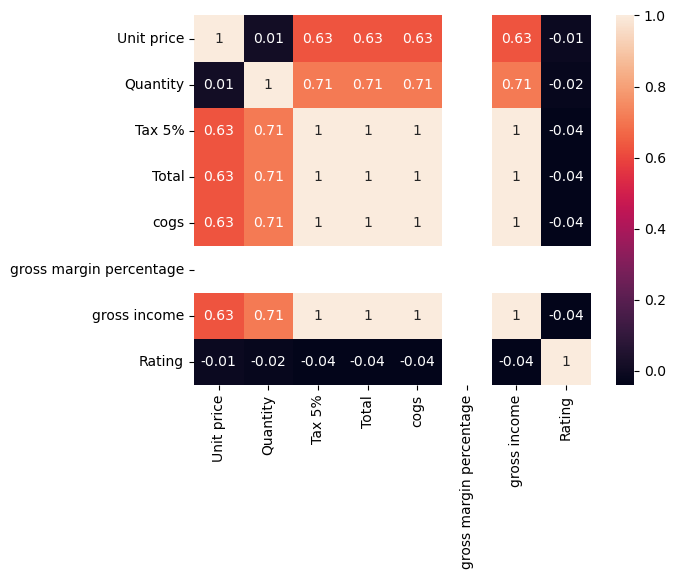

In [56]:
sns.heatmap(np.round(df.corr(numeric_only=True), 2), annot=True)

In [ ]:
x